In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

In [122]:
cancer = load_breast_cancer()

In [123]:
cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

In [124]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [125]:
x = cancer_df.iloc[:,:-1]
y = cancer_df.iloc[:,-1]

In [126]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [127]:
x_scaled = scaler.transform(x)

In [128]:
x_scaled[0]

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

In [130]:
svc = SVC(kernel="linear", C=1.0, gamma="auto", random_state=0)

#### 교차검증 - 가지고 있는 데이터셋를 쪼개서 여러번 학습 
 - 학습하는 데이터 외 나머지 데이터 셋을 평가지표로 사용

In [131]:
score = cross_val_score(svc, x_scaled, y, cv=5)

In [132]:
score

array([0.95614035, 0.98245614, 0.96491228, 0.96491228, 0.98230088])

In [133]:
print("교차검증 평균: " , score.mean())

교차검증 평균:  0.9701443875174661


### 비선형

In [134]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

In [135]:
x, y = make_moons(n_samples = 300, noise = 0.1, random_state=42)

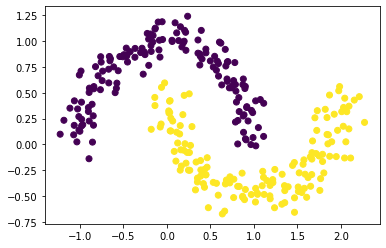

In [136]:
plt.scatter(x[:,0],x[:,1], c=y)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=0)

In [138]:
svm = SVC(kernel="poly", C=1.0, gamma="auto" ,random_state=0)

score = cross_val_score(svm, x, y, cv=5)
score

array([0.93333333, 0.85      , 0.95      , 0.86666667, 0.9       ])

In [139]:
print("교차검증 평균: ", score.mean())

교차검증 평균:  0.9


In [167]:
svm_1 = SVC(kernel="rbf", C=5.0, gamma="auto", random_state=0)

score = cross_val_score(svm_1, x, y, cv=5)
score

array([1., 1., 1., 1., 1.])

In [168]:
print("교차검증 평균: ", score.mean())

교차검증 평균:  1.0


In [169]:
svm_1.fit(X_train,y_train)

SVC(C=5.0, gamma='auto', random_state=0)

In [170]:
svm_1.score(X_test,y_test)

1.0

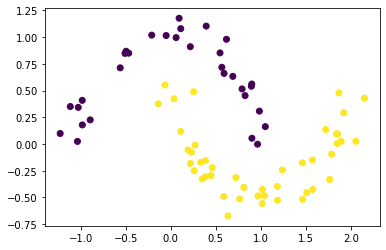

In [171]:
plt.scatter(X_test[:,0],X_test[:,1], c=svm_1.predict(X_test))